# **Training Menggunakan VGG16 (Transfer Learning dari Model 1) Augmentasi**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2 as cv
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import multiprocessing

In [ ]:
path_augmented = "/content/drive/MyDrive/Skripsi_Dataset/Dataset_Augmented/Data Train Gabungan"

In [ ]:
key_value_aug = dict()
for i in os.listdir(path_augmented):
    key_value_aug[i] = os.listdir(os.path.join(path_augmented, i))

df_aug = []
for key in key_value_aug.keys():
    for j in key_value_aug[key]:
        df_aug.append([key, os.path.join(path_augmented, key, j)])
df_aug = pd.DataFrame(df_aug, columns=('label', 'path'))
print("Total gambar training augmentasi:", len(df_aug))

Total gambar training augmentasi: 1649


In [ ]:
# ====== LOAD GAMBAR TRAINING ======
def readimg(path):
    img = cv.imread(path)
    img = cv.resize(img, (224, 224))
    return img

with multiprocessing.Pool(4) as p:
    images = p.map(readimg, df_aug['path'])

images = np.array(images, dtype='float')

In [ ]:
le = preprocessing.LabelEncoder()
y_labels = le.fit_transform(df_aug['label'])
print("Label asli:", list(le.classes_))

Label asli: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(
    images, y_labels, test_size=0.2, random_state=1
)

In [ ]:
print(f"Jumlah data train : {len(train_images)}")
print(f"Jumlah data val   : {len(val_images)}")

Jumlah data train : 1319
Jumlah data val   : 330


In [ ]:
# ## implementing trensfer learning
# base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # freezing the base model so we donot have to train it again
# base_model.trainable = False

# model = keras.Sequential([
#   base_model,
#   keras.layers.GlobalAveragePooling2D(),
#   keras.layers.Dense(1024, activation='relu'),
#   keras.layers.Dense(10, activation='softmax')
# ])
# model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [ ]:
# ===================== LOAD MODEL 1 ============================
model_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainOri.keras"
model = keras.models.load_model(model_path)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,321,376 (62.26 MB)

 Trainable params: 535,562 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,071,126 (4.09 MB)

In [ ]:
# ================= Freeze Base Model ==========================
for layer in model.layers[0].layers:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=32,
    validation_data=(val_images, val_labels),
    shuffle=True
)

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 286ms/step - accuracy: 0.8296 - loss: 1.2038 - val_accuracy: 0.8788 - val_loss: 0.5708
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.8755 - loss: 0.6597 - val_accuracy: 0.8818 - val_loss: 0.5856
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.8990 - loss: 0.4264 - val_accuracy: 0.9000 - val_loss: 0.4186
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.9212 - loss: 0.3190 - val_accuracy: 0.8970 - val_loss: 0.4443
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - accuracy: 0.9529 - loss: 0.1846 - val_accuracy: 0.9091 - val_loss: 0.3496
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.9552 - loss: 0.1372 - val_accuracy: 0.8879 - val_loss: 0.3770
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.9613 - loss: 0.1528 - val_accuracy: 0.9061 - val_loss: 0.3442
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.9769 - loss: 0.0998 - val_accuracy:

In [ ]:
# ===================== SIMPAN HISTORY KE CSV ============================
# Mengubah history ke DataFrame
hist_df = pd.DataFrame(history.history)

# Menentukan path penyimpanan di Google Drive
csv_path = "/content/drive/MyDrive/Skripsi_Dataset/Csv Training/VGG16_TL_TrainAug_Model1.csv"

# Simpan ke CSV
hist_df.to_csv(csv_path, index=False)

print(f"Hasil training telah disimpan ke: {csv_path}")

Hasil training telah disimpan ke: /content/drive/MyDrive/Skripsi_Dataset/Csv Training/VGG16_TL_TrainAug_Model1.csv


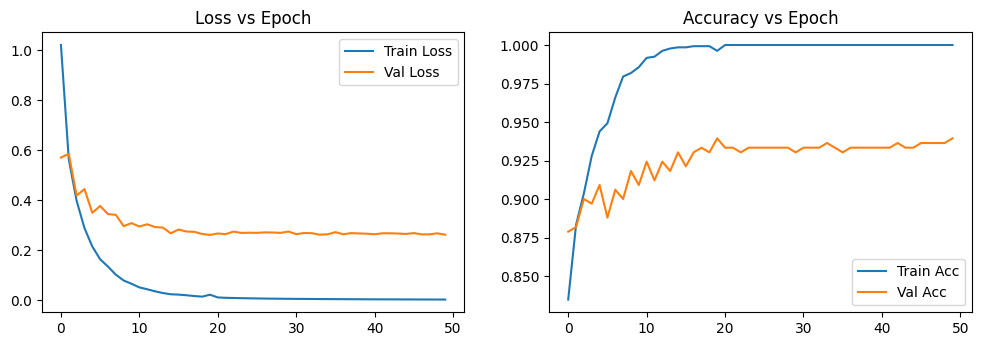

In [ ]:
# Grafik Loss dan Akurasi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss vs Epoch')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy vs Epoch')
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 309ms/step

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        29
           1     0.9744    0.9744    0.9744        39
           2     0.9630    0.9286    0.9455        28
           3     0.9677    0.9091    0.9375        33
           4     0.9355    0.9062    0.9206        32
           5     0.9615    0.9615    0.9615        26
           6     0.9677    0.9375    0.9524        32
           7     0.8293    1.0000    0.9067        34
           8     0.9714    0.8500    0.9067        40
           9     0.8750    0.9459    0.9091        37

    accuracy                         0.9394       330
   macro avg     0.9446    0.9413    0.9414       330
weighted avg     0.9431    0.9394    0.9396       330



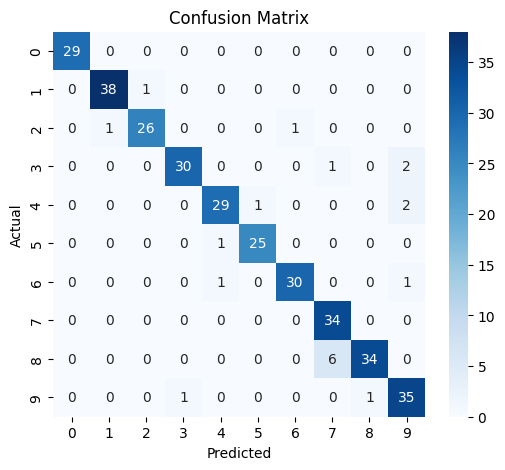

In [ ]:
pred = model.predict(val_images)
pred_labels = np.argmax(pred, axis=1)

print("\nClassification Report:")
print(classification_report(val_labels, pred_labels, target_names=le.classes_, digits=4))

cm = confusion_matrix(val_labels, pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
save_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru"
os.makedirs(save_path, exist_ok=True)

model_name_keras = "VGG16_TL_TrainAug_Model1.keras"
model_name_h5 = "VGG16_TL_TrainAug_Model1.h5"

full_path_keras = os.path.join(save_path, model_name_keras)
full_path_h5 = os.path.join(save_path, model_name_h5)

model.save(full_path_keras)
model.save(full_path_h5)

print("\n Model berhasil disimpan dalam format .keras dan .h5")
print(f"Lokasi Keras: {full_path_keras}")
print(f"Lokasi H5: {full_path_h5}")



 Model berhasil disimpan dalam format .keras dan .h5
Lokasi Keras: /content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainAug_Model1.keras
Lokasi H5: /content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainAug_Model1.h5


# **DATA TEST ASLI**

In [ ]:
import os
import numpy as np
import cv2 as cv
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainAug_Model1.keras"
test_new_dir = "/content/drive/MyDrive/Skripsi_Dataset/Dataset/Test_Images"

In [ ]:
print("Memuat model yang sudah dilatih...")
model = tf.keras.models.load_model(model_path)
print("Model berhasil dimuat!")

Memuat model yang sudah dilatih...
Model berhasil dimuat!


In [ ]:
key_value_test_new = dict()
for i in os.listdir(test_new_dir):
    key_value_test_new[i] = os.listdir(os.path.join(test_new_dir, i))

In [ ]:
df_test_new = []
for key in key_value_test_new.keys():
    for j in key_value_test_new[key]:
        df_test_new.append([key, os.path.join(test_new_dir, key, j)])
df_test_new = pd.DataFrame(df_test_new, columns=('label', 'path'))
print("Total gambar test baru:", len(df_test_new))

Total gambar test baru: 413


In [ ]:
def readimg(path):
    img = cv.imread(path)
    img = cv.resize(img, (224, 224))
    return img

In [ ]:
import multiprocessing
with multiprocessing.Pool(4) as p:
    test_images_new = p.map(readimg, df_test_new['path'])

test_images_new = np.array(test_images_new, dtype='float')

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_test_new['label'])
test_labels_new = le.transform(df_test_new['label'])

In [ ]:
print("\n Melakukan prediksi pada data test baru...")
predictions_new = model.predict(test_images_new)
predicted_labels_new = np.argmax(predictions_new, axis=1)


 Melakukan prediksi pada data test baru...
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


In [ ]:
accuracy = accuracy_score(test_labels_new, predicted_labels_new)
precision = precision_score(test_labels_new, predicted_labels_new, average='macro')
recall = recall_score(test_labels_new, predicted_labels_new, average='macro')
f1 = f1_score(test_labels_new, predicted_labels_new, average='macro')

In [ ]:
print("\n=== HASIL EVALUASI DATA TEST ASLI TANPA AUGMENTASI ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


=== HASIL EVALUASI DATA TEST ASLI TANPA AUGMENTASI ===
Accuracy : 0.9395
Precision: 0.9422
Recall   : 0.9405
F1-Score : 0.9408


In [ ]:
target_class_names = le.classes_
print("\nClassification Report:")
print(classification_report(test_labels_new, predicted_labels_new, target_names=target_class_names, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        47
           1     1.0000    1.0000    1.0000        35
           2     0.9302    0.9302    0.9302        43
           3     1.0000    1.0000    1.0000        41
           4     0.9737    0.8810    0.9250        42
           5     1.0000    0.9750    0.9873        40
           6     0.8750    0.9459    0.9091        37
           7     0.8043    0.8409    0.8222        44
           8     0.8913    0.9318    0.9111        44
           9     0.9474    0.9000    0.9231        40

    accuracy                         0.9395       413
   macro avg     0.9422    0.9405    0.9408       413
weighted avg     0.9413    0.9395    0.9399       413



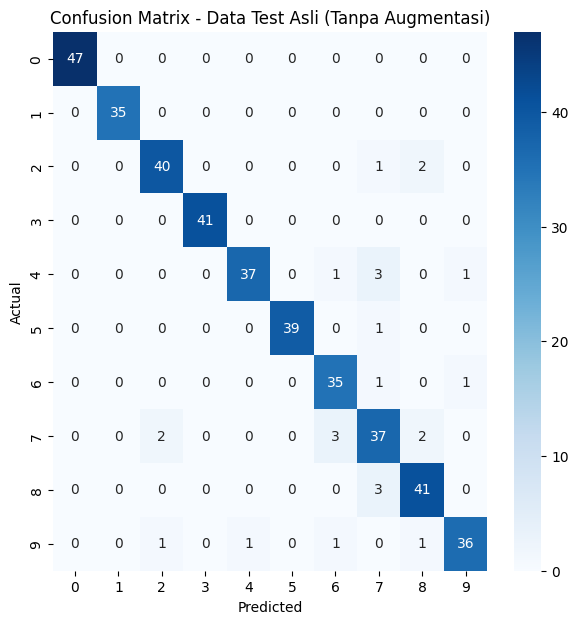

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(test_labels_new, predicted_labels_new)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=target_class_names,
            yticklabels=target_class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Data Test Asli (Tanpa Augmentasi)")
plt.show()

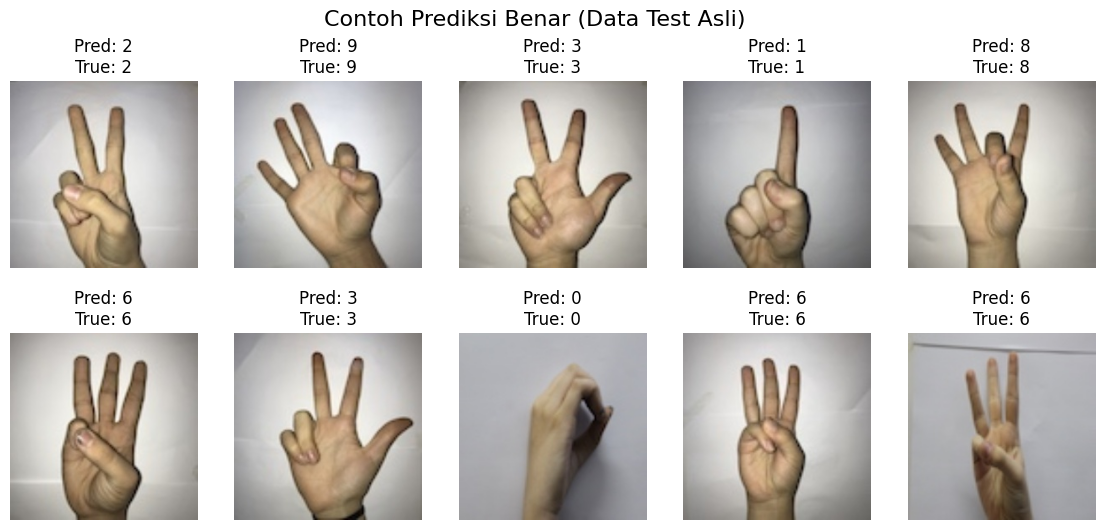

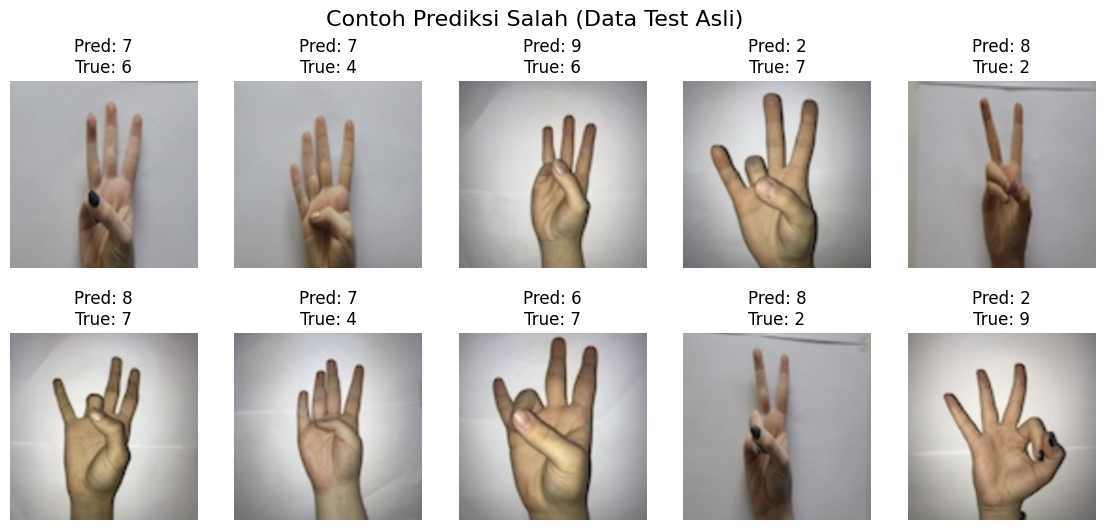

In [ ]:
import random

correct_idx = np.where(predicted_labels_new == test_labels_new)[0]
incorrect_idx = np.where(predicted_labels_new != test_labels_new)[0]

def show_images(indices, title):
    plt.figure(figsize=(14, 6))
    for i, idx in enumerate(random.sample(list(indices), min(10, len(indices)))):
        plt.subplot(2, 5, i + 1)
        img = cv.cvtColor(test_images_new[idx].astype('uint8'), cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Pred: {target_class_names[predicted_labels_new[idx]]}\nTrue: {target_class_names[test_labels_new[idx]]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

show_images(correct_idx, "Contoh Prediksi Benar (Data Test Asli)")
show_images(incorrect_idx, "Contoh Prediksi Salah (Data Test Asli)")

# **DATA TEST AUGMENTASI**

In [ ]:
import os
import numpy as np
import cv2 as cv
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainAug_Model1.keras"
test_new_dir = "/content/drive/MyDrive/Skripsi_Dataset/Dataset_Augmented/Data_Test"

In [ ]:
print("Memuat model yang sudah dilatih...")
model = tf.keras.models.load_model(model_path)
print("Model berhasil dimuat!")

Memuat model yang sudah dilatih...
Model berhasil dimuat!


In [ ]:
key_value_test_new = dict()
for i in os.listdir(test_new_dir):
    key_value_test_new[i] = os.listdir(os.path.join(test_new_dir, i))

In [ ]:
df_test_new = []
for key in key_value_test_new.keys():
    for j in key_value_test_new[key]:
        df_test_new.append([key, os.path.join(test_new_dir, key, j)])
df_test_new = pd.DataFrame(df_test_new, columns=('label', 'path'))
print("Total gambar test baru:", len(df_test_new))

Total gambar test baru: 413


In [ ]:
def readimg(path):
    img = cv.imread(path)
    img = cv.resize(img, (224, 224))
    return img

In [ ]:
import multiprocessing
with multiprocessing.Pool(4) as p:
    test_images_new = p.map(readimg, df_test_new['path'])

test_images_new = np.array(test_images_new, dtype='float')

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_test_new['label'])
test_labels_new = le.transform(df_test_new['label'])

In [ ]:
print("\n Melakukan prediksi pada data test augmentasi...")
predictions_new = model.predict(test_images_new)
predicted_labels_new = np.argmax(predictions_new, axis=1)


 Melakukan prediksi pada data test augmentasi...
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step


In [ ]:
accuracy = accuracy_score(test_labels_new, predicted_labels_new)
precision = precision_score(test_labels_new, predicted_labels_new, average='macro')
recall = recall_score(test_labels_new, predicted_labels_new, average='macro')
f1 = f1_score(test_labels_new, predicted_labels_new, average='macro')

In [ ]:
print("\n=== HASIL EVALUASI DATA TEST AUGMENTASI ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


=== HASIL EVALUASI DATA TEST AUGMENTASI ===
Accuracy : 0.9128
Precision: 0.9175
Recall   : 0.9133
F1-Score : 0.9134


In [ ]:
target_class_names = le.classes_
print("\nClassification Report:")
print(classification_report(test_labels_new, predicted_labels_new, target_names=target_class_names, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9592    1.0000    0.9792        47
           1     0.9714    0.9714    0.9714        35
           2     0.9286    0.9070    0.9176        43
           3     0.8667    0.9512    0.9070        41
           4     0.9302    0.9524    0.9412        42
           5     0.9512    0.9750    0.9630        40
           6     0.9394    0.8378    0.8857        37
           7     0.7600    0.8636    0.8085        44
           8     0.9429    0.7500    0.8354        44
           9     0.9250    0.9250    0.9250        40

    accuracy                         0.9128       413
   macro avg     0.9175    0.9133    0.9134       413
weighted avg     0.9161    0.9128    0.9124       413



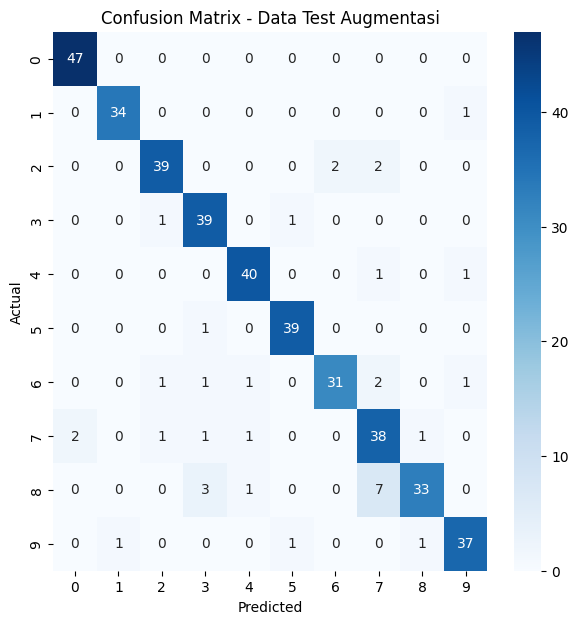

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(test_labels_new, predicted_labels_new)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=target_class_names,
            yticklabels=target_class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Data Test Augmentasi")
plt.show()

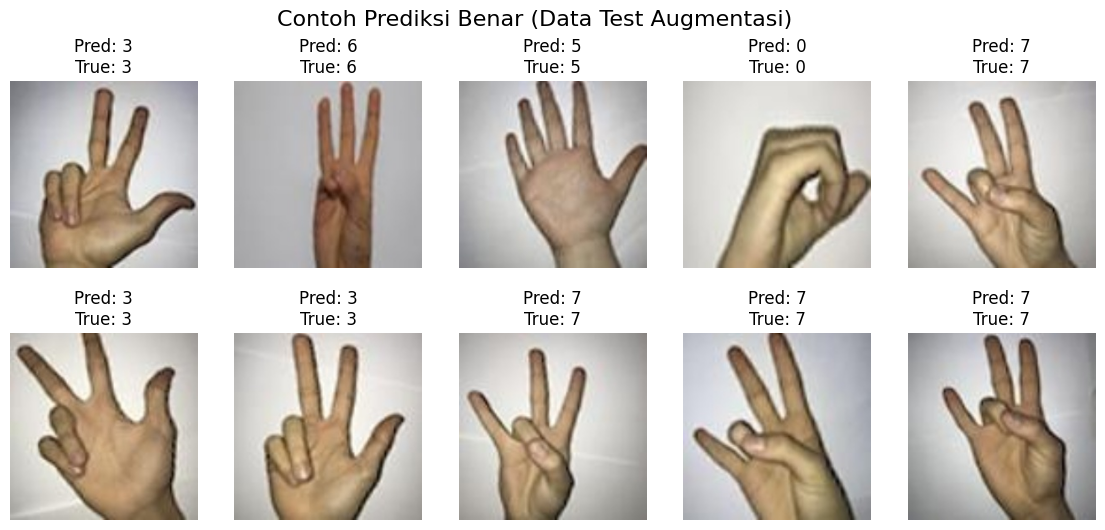

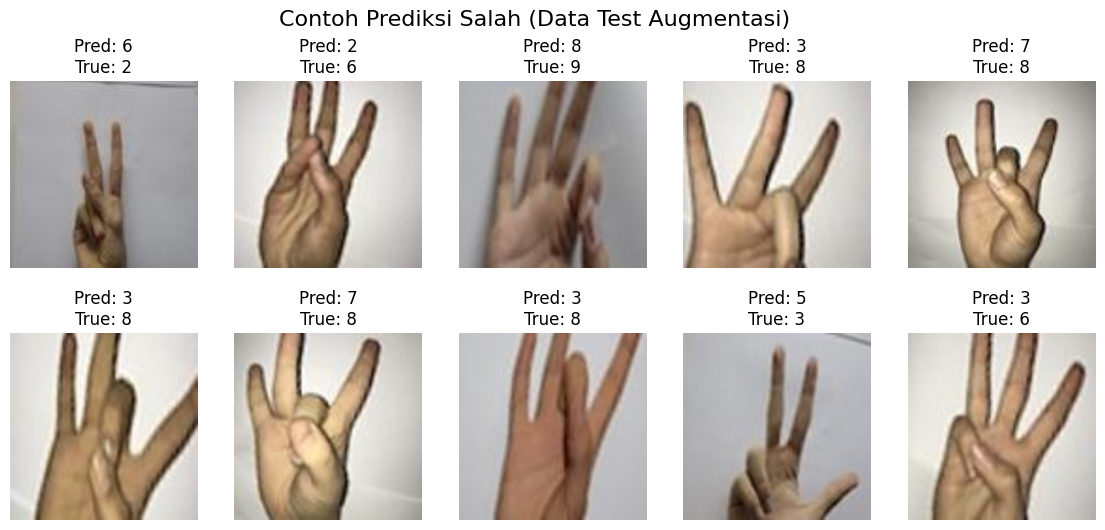

In [ ]:
import random

correct_idx = np.where(predicted_labels_new == test_labels_new)[0]
incorrect_idx = np.where(predicted_labels_new != test_labels_new)[0]

def show_images(indices, title):
    plt.figure(figsize=(14, 6))
    for i, idx in enumerate(random.sample(list(indices), min(10, len(indices)))):
        plt.subplot(2, 5, i + 1)
        img = cv.cvtColor(test_images_new[idx].astype('uint8'), cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Pred: {target_class_names[predicted_labels_new[idx]]}\nTrue: {target_class_names[test_labels_new[idx]]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

show_images(correct_idx, "Contoh Prediksi Benar (Data Test Augmentasi)")
show_images(incorrect_idx, "Contoh Prediksi Salah (Data Test Augmentasi)")

# **DATA TEST GABUNGAN**

In [ ]:
import os
import numpy as np
import cv2 as cv
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model_path = "/content/drive/MyDrive/Skripsi_Dataset/Model Baru/VGG16_TL_TrainAug_Model1.keras"
test_new_dir = "/content/drive/MyDrive/Skripsi_Dataset/Data Test Gabungan"

In [ ]:
print("Memuat model yang sudah dilatih...")
model = tf.keras.models.load_model(model_path)
print("Model berhasil dimuat!")

Memuat model yang sudah dilatih...
Model berhasil dimuat!


In [ ]:
key_value_test_new = dict()
for i in os.listdir(test_new_dir):
    key_value_test_new[i] = os.listdir(os.path.join(test_new_dir, i))

In [ ]:
df_test_new = []
for key in key_value_test_new.keys():
    for j in key_value_test_new[key]:
        df_test_new.append([key, os.path.join(test_new_dir, key, j)])
df_test_new = pd.DataFrame(df_test_new, columns=('label', 'path'))
print("Total gambar test gabungan:", len(df_test_new))

Total gambar test gabungan: 826


In [ ]:
def readimg(path):
    img = cv.imread(path)
    img = cv.resize(img, (224, 224))
    return img

In [ ]:
import multiprocessing
with multiprocessing.Pool(4) as p:
    test_images_new = p.map(readimg, df_test_new['path'])

test_images_new = np.array(test_images_new, dtype='float')

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_test_new['label'])
test_labels_new = le.transform(df_test_new['label'])

In [ ]:
print("\n Melakukan prediksi pada data test gabungan...")
predictions_new = model.predict(test_images_new)
predicted_labels_new = np.argmax(predictions_new, axis=1)


 Melakukan prediksi pada data test gabungan...
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 554ms/step


In [ ]:
accuracy = accuracy_score(test_labels_new, predicted_labels_new)
precision = precision_score(test_labels_new, predicted_labels_new, average='macro')
recall = recall_score(test_labels_new, predicted_labels_new, average='macro')
f1 = f1_score(test_labels_new, predicted_labels_new, average='macro')

In [ ]:
print("\n=== HASIL EVALUASI DATA TEST GABUNGAN ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")


=== HASIL EVALUASI DATA TEST GABUNGAN ===
Accuracy : 0.9262
Precision: 0.9285
Recall   : 0.9269
F1-Score : 0.9273


In [ ]:
target_class_names = le.classes_
print("\nClassification Report:")
print(classification_report(test_labels_new, predicted_labels_new, target_names=target_class_names, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9792    1.0000    0.9895        94
           1     0.9857    0.9857    0.9857        70
           2     0.9294    0.9186    0.9240        86
           3     0.9302    0.9756    0.9524        82
           4     0.9506    0.9167    0.9333        84
           5     0.9750    0.9750    0.9750        80
           6     0.9041    0.8919    0.8980        74
           7     0.7812    0.8523    0.8152        88
           8     0.9136    0.8409    0.8757        88
           9     0.9359    0.9125    0.9241        80

    accuracy                         0.9262       826
   macro avg     0.9285    0.9269    0.9273       826
weighted avg     0.9274    0.9262    0.9263       826



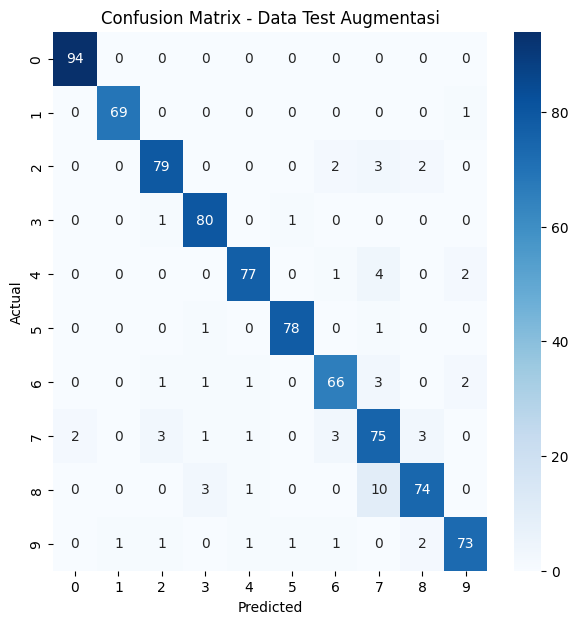

In [ ]:
plt.figure(figsize=(7,7))
cm = confusion_matrix(test_labels_new, predicted_labels_new)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=target_class_names,
            yticklabels=target_class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Data Test Augmentasi")
plt.show()

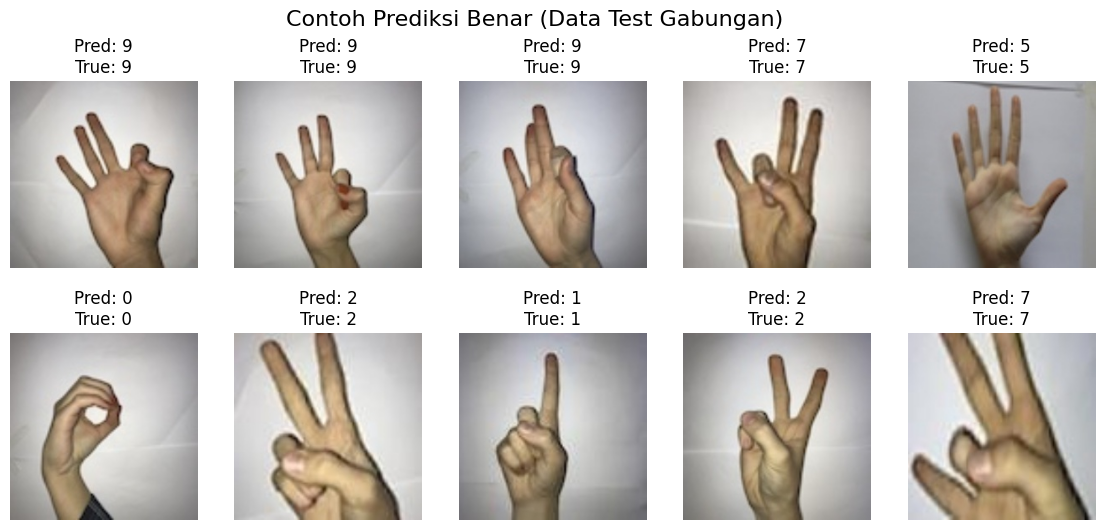

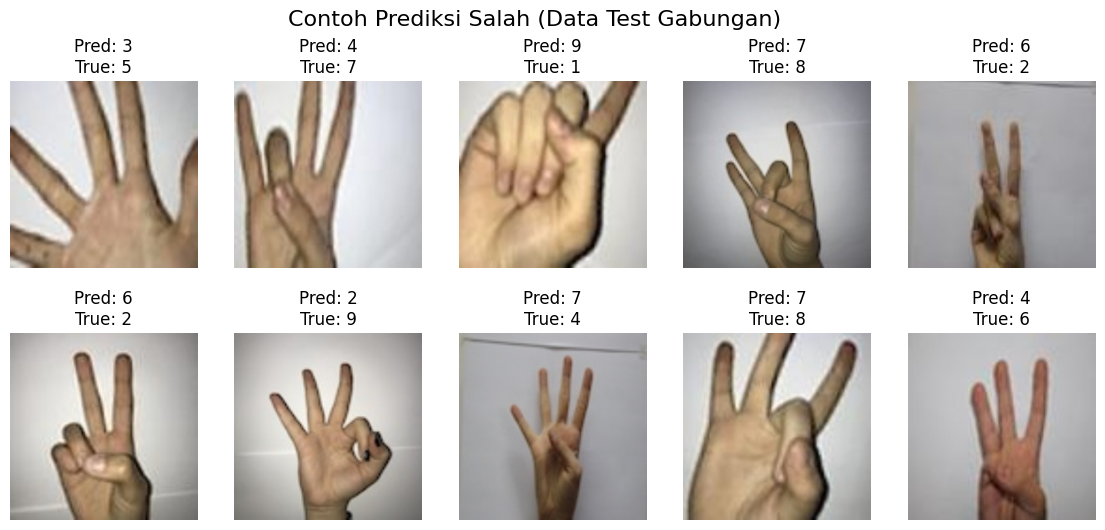

In [ ]:
import random

correct_idx = np.where(predicted_labels_new == test_labels_new)[0]
incorrect_idx = np.where(predicted_labels_new != test_labels_new)[0]

def show_images(indices, title):
    plt.figure(figsize=(14, 6))
    for i, idx in enumerate(random.sample(list(indices), min(10, len(indices)))):
        plt.subplot(2, 5, i + 1)
        img = cv.cvtColor(test_images_new[idx].astype('uint8'), cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Pred: {target_class_names[predicted_labels_new[idx]]}\nTrue: {target_class_names[test_labels_new[idx]]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

show_images(correct_idx, "Contoh Prediksi Benar (Data Test Gabungan)")
show_images(incorrect_idx, "Contoh Prediksi Salah (Data Test Gabungan)")